In [1]:
from importing_sb import *
from pitch_plotting import *
import numpy as np
import pandas as pd

data_dir = '/Users/jm533/Documents/GitHub/football_analytics/open-data/data/'

comp_data = open_data(data_dir + 'competitions.json')
la_liga_seasons = [i['season_id'] for i in comp_data if i['competition_id'] == 11]
match_data = [sorted(open_data(data_dir + 'matches/11/{}.json'.format(i)), key = lambda k:k['match_date']) for i in la_liga_seasons]
#event_data = [[open_data(data_dir + 'events/{}.json'.format(j['match_id'])) for j in i] for i in match_data]
#match_data = [pd.DataFrame(open_data(data_dir + 'matches/11/{}.json'.format(i))).sort_values('match_week',ascending=True) for i in la_liga_seasons]
#event_data = [[pd.DataFrame(open_data(data_dir + 'events/{}.json'.format(j))) for j in i['match_id']] for i in match_data]


comp_df = pd.DataFrame(comp_data)
#match_df = pd.DataFrame(match_data)

In [2]:
years = list(range(2015,2003,-1))
match_id = {}
for i in range(len(years)):
    df = pd.DataFrame(match_data[i])
    match_id[str(years[i])] = df['match_id'].values

In [3]:
event_data = {}
for year in years:
    event_data[str(year)] = []
    for match in match_id[str(year)]:
        event_data[str(year)].append(open_data(data_dir + 'events/{}.json'.format(str(match))))

In [4]:
event_data_15 = [i for match in event_data['2015'] for i in match]

In [5]:
messi = 'Lionel Andrés Messi Cuccittini'

In [6]:
# Calculate amount of 90s played per season
m_90_played = []
for year in years:
    tot = 0
    for i in range(len(event_data[str(year)])):
        tot += get_player_info(event_data[str(year)][i],messi).sec_played
        
    m_90_played.append((tot / 60) / 90)

In [13]:
m_90_played

[31.193703703703704,
 38.763888888888886,
 28.72759259259259,
 30.458333333333332,
 37.52240740740741,
 32.82055555555556,
 32.55166666666667,
 28.943333333333335,
 22.907777777777774,
 22.799074074074074,
 10.357037037037037,
 1.0203703703703704]

## Shots

In [6]:
shots = {}
for year in years:
    shots[str(year)] = [get_shots(match) for match in event_data[str(year)]]

In [7]:
shots_seas = {}
for year in shots:
    shots_seas[str(year)] = pd.concat(shots[str(year)])
    shots_seas[str(year)].reset_index(inplace=True)

In [8]:
m_shots_seas = {}
for year in years:
    m_shots_seas[str(year)] = shots_seas[str(year)][shots_seas[str(year)]['player'] == messi]

In [30]:
m_h = np.array([len(m_shots_seas[str(i)][m_shots_seas[str(i)]['body_part'] == 'Head']) for i in years])
m_h_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Head')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
m_lf = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years])
m_lf_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Left Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
m_rf = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years])
m_rf_g = np.array([len(m_shots_seas[str(i)][(m_shots_seas[str(i)]['body_part'] == 'Right Foot')&(m_shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])

h = np.array([len(shots_seas[str(i)][shots_seas[str(i)]['body_part'] == 'Head']) for i in years])
h_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Head')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
lf = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')]) for i in years])
lf_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Left Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])
rf = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')]) for i in years])
rf_g = np.array([len(shots_seas[str(i)][(shots_seas[str(i)]['body_part'] == 'Right Foot')&(shots_seas[str(i)]['outcome'] == 'Goal')]) for i in years])

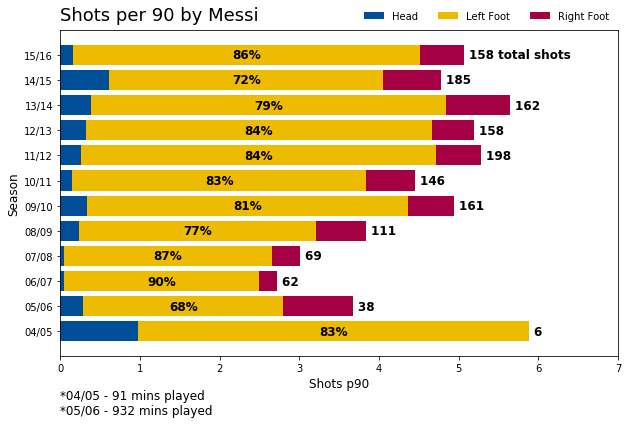

In [112]:
ind = list(reversed(np.arange(len(years))))
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']

fig, ax = plt.subplots(figsize=(10,6))
p1 = ax.barh(ind, m_h / m_90_played,color='#004d98')
p2 = ax.barh(ind, m_lf / m_90_played,left=m_h / m_90_played,color='#edbb00')
p3 = ax.barh(ind, m_rf / m_90_played,left=(m_lf+m_h) / m_90_played,color='#a50044')

#labels = ax.get_xticklabels()
ax.set_yticks(ind)
ax.set_yticklabels(seasons)
ax.set_xlabel('Shots p90',fontsize=12)
ax.set_ylabel('Season',fontsize=12)
ax.set_xlim(0,7)
#ax.set_title('Shots per 90 by Messi')

ax.text(0.0,1.03,'Shots per 90 by Messi',transform=ax.transAxes,fontsize=18)
ax.legend((p1[0], p2[0], p3[0]), ('Head', 'Left Foot', 'Right Foot'),ncol=3,loc=4,bbox_to_anchor=(1.0,1.0),frameon=False)

tshotslabels = ['total shots']
for i in range(len(seasons)-1):
    tshotslabels.append('')

for i in range(len(ind)):
    ax.annotate('{0} {1}'.format((m_h + m_lf + m_rf)[i],tshotslabels[i]),
                    xy=(((m_h + m_lf + m_rf)[i] / m_90_played[i]), ind[i]), xytext=(5,0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=12, fontweight='bold')
    
ax.text(0.0, -0.1, '*04/05 - 91 mins played\n*05/06 - 932 mins played', ha='left', va='top', transform=ax.transAxes, fontsize=12)

for i in range(len(ind)):
    ax.annotate('{:.0f}%'.format((m_lf[i]/sum([m_h[i],m_lf[i],m_rf[i]])) * 100),
                    xy=(((m_lf[i] / 2) + m_h[i]) / m_90_played[i], ind[i]), xytext=(0,0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()
#fig.savefig('example_plots/messi_shotsp90.pdf',bbox_inches='tight')

/Users/jm533/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


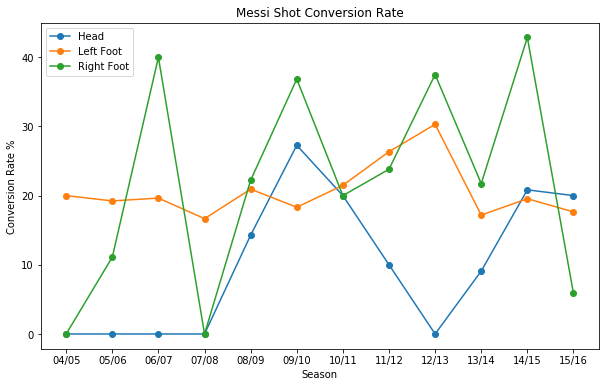

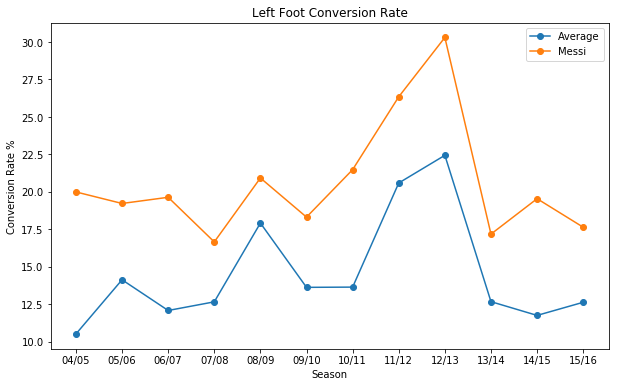

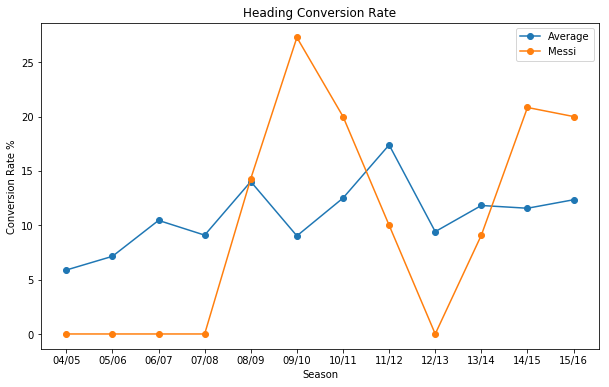

In [111]:
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']
ind = list(reversed(np.arange(len(seasons))))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Head')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Left Foot')
ax.plot(ind, np.nan_to_num((np.array(m_rf_g) / np.array(m_rf))) * 100, '-o',label='Right Foot')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Messi Shot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(lf_g) / np.array(lf)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_lf_g) / np.array(m_lf)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Left Foot Conversion Rate')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind, (np.array(h_g) / np.array(h)) * 100, '-o',label='Average')
ax.plot(ind, (np.array(m_h_g) / np.array(m_h)) * 100, '-o',label='Messi')
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Conversion Rate %',title='Heading Conversion Rate')
ax.legend(loc='best')

plt.show()

In [26]:
print(np.mean((np.array(h_g) / np.array(h)) * 100))
print(np.mean((np.array(m_h_g) / np.array(m_h)) * 100))

10.886390340275925
10.123556998557


## Passes

In [113]:
passes = {}
for year in years:
    passes[str(year)] = [get_pass(match) for match in event_data[str(year)]]

In [114]:
passes_seas = {}
for year in passes:
    passes_seas[str(year)] = pd.concat(passes[str(year)])
    passes_seas[str(year)].reset_index(inplace=True)

In [115]:
m_pass_seas = {}
m_pass_op_seas ={}
for year in years:
    m_pass_seas[str(year)] = passes_seas[str(year)][passes_seas[str(year)]['player'] == messi]
    m_pass_op_seas[str(year)] = passes_seas[str(year)][(passes_seas[str(year)]['player'] == messi)&
                                                       (passes_seas[str(year)]['pass_type'] == 'Standard')]

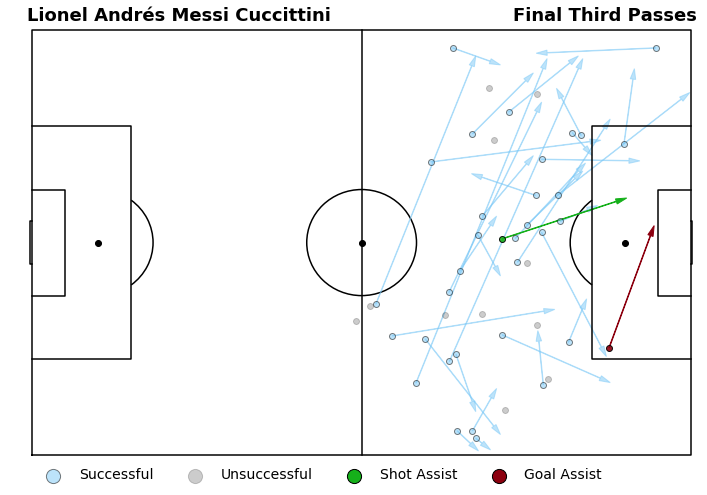

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11478c6d8>)

In [7]:
pass_map_player(event_data['2015'][3],messi,'third')

### Pass Quantity

In [117]:
m_pass_op_tot = [len(m_pass_op_seas[str(i)]) for i in years]
m_ft_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['end_x'] >= 80.]) for i in years]
m_box_pass_op_tot = [len(m_pass_op_seas[str(i)][(m_pass_op_seas[str(i)]['end_x'] >= 102.)&
                                                (m_pass_op_seas[str(i)]['end_y'] >= 18.)&
                                                (m_pass_op_seas[str(i)]['end_y'] <= 62.)]) for i in years]

In [118]:
m_pass_p90 = np.array(m_pass_op_tot) / np.array(m_90_played)
m_ft_pass_p90 = np.array(m_ft_pass_op_tot) / np.array(m_90_played)
m_box_pass_p90 = np.array(m_box_pass_op_tot) / np.array(m_90_played)

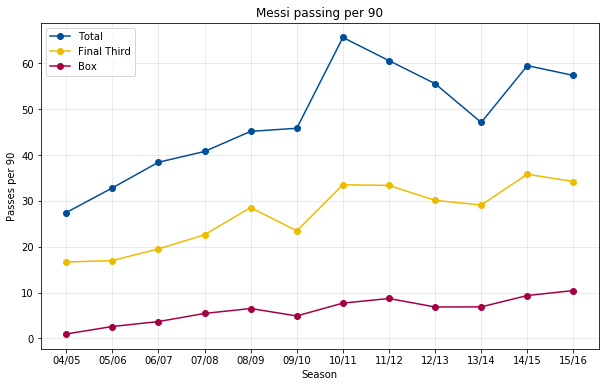

In [219]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_pass_p90,'-o',c='#004d98',label='Total')
ax.plot(ind,m_ft_pass_p90,'-o',c='#edbb00',label='Final Third')
ax.plot(ind,m_box_pass_p90,'-o',c='#a50044',label='Box')

ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90',title='Messi passing per 90')
ax.legend(loc=2)

ax.grid(True,alpha=0.3)

plt.show()

### What about types of passes?

In [120]:
m_thru_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['technique'] == 'Through Ball']) for i in years]
m_cross_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['cross'] == True]) for i in years]
m_switch_pass_op_tot = [len(m_pass_op_seas[str(i)][m_pass_op_seas[str(i)]['switch'] == True]) for i in years]

In [121]:
m_thru_p90 = np.array(m_thru_pass_op_tot) / np.array(m_90_played)
m_cross_p90 = np.array(m_cross_pass_op_tot) / np.array(m_90_played)
m_switch_p90 = np.array(m_switch_pass_op_tot) / np.array(m_90_played)

In [122]:
man_dates = [0,3+(5/12),7+(6/12),8+(7/12),9+(5/12)]
man_names = ['Rijkaard','Guardiola','Vilanova','Martino','Enrique']

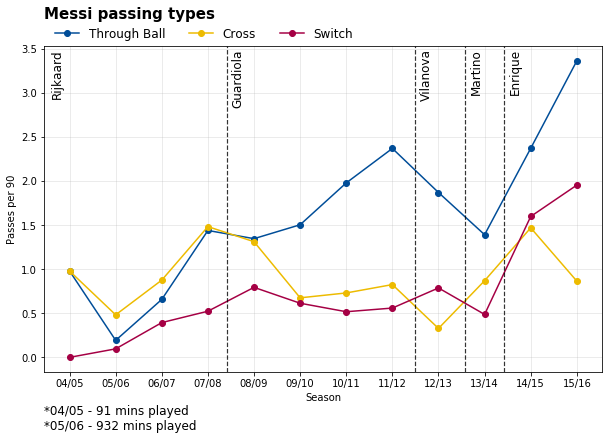

In [220]:
ind = np.flip(np.arange(len(years)))

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ind,m_thru_p90,'-o',c='#004d98',label='Through Ball')
ax.plot(ind,m_cross_p90,'-o',c='#edbb00',label='Cross')
ax.plot(ind,m_switch_p90,'-o',c='#a50044',label='Switch')

for i in range(len(man_dates)-1):
    ax.axvline(man_dates[i+1],0,1,c='k',ls='--',lw=1.2,alpha=0.8)
    ax.text(man_dates[i+1]+0.1,3.5,man_names[i+1],fontsize=12,ha='left',va='top',rotation=90)
    
ax.text(man_dates[0]-0.4,3.5,man_names[0],fontsize=12,ha='left',va='top',rotation=90)
    
ax.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Passes per 90')
ax.legend(loc=2,bbox_to_anchor=(0,1.09),ncol=3,frameon=False,fontsize=12)

ax.text(0.0,1.12,'Messi passing types',ha='left', va='top',transform=ax.transAxes,fontsize=15,fontweight='semibold')
ax.text(0.0, -0.1, '*04/05 - 91 mins played\n*05/06 - 932 mins played', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax.grid(True,alpha=0.3)

plt.show()
#fig.savefig('example_plots/messi_pass_type_p90.pdf',bbox_inches='tight')

In [185]:
m_pass_match = {}
for year in list(reversed(years)):
    m_pass_match[str(year)] = []
    for i in range(len(passes[str(year)])):
        m_pass_match[str(year)].append(passes[str(year)][i][(passes[str(year)][i]['player'] == messi)&
                                                     (passes[str(year)][i]['pass_type'] == 'Standard')])

In [186]:
m_pass_op_match = {}
for year in list(reversed(years)):
    m_pass_op_match[str(year)] = []
    for i in range(len(m_pass_match[str(year)])):
        m_pass_op_match[str(year)].append(len(m_pass_match[str(year)][i]))

In [212]:
m_pass_temp = [*m_pass_op_match.values()]
m_pass_all_df = pd.DataFrame([val for sublist in m_pass_temp for val in sublist])

In [214]:
roll_avg = m_pass_all_df.rolling(6).mean().values

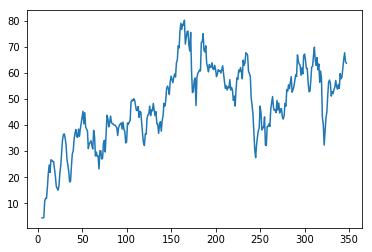

In [215]:
plt.plot(np.arange(len(roll_avg)),roll_avg)

## Carries and Dribbles

In [7]:
m_car_prog_15 = get_carry_prog(event_data_15,find_success=True,player=messi)

In [34]:
m_car_prog_15;

In [16]:
print(m_car_prog_15[m_car_prog_15['xA'].notna()].xA.sum())
print(m_car_prog_15[m_car_prog_15['xG'].notna()].xG.sum())

4.7649736865
1.672377198


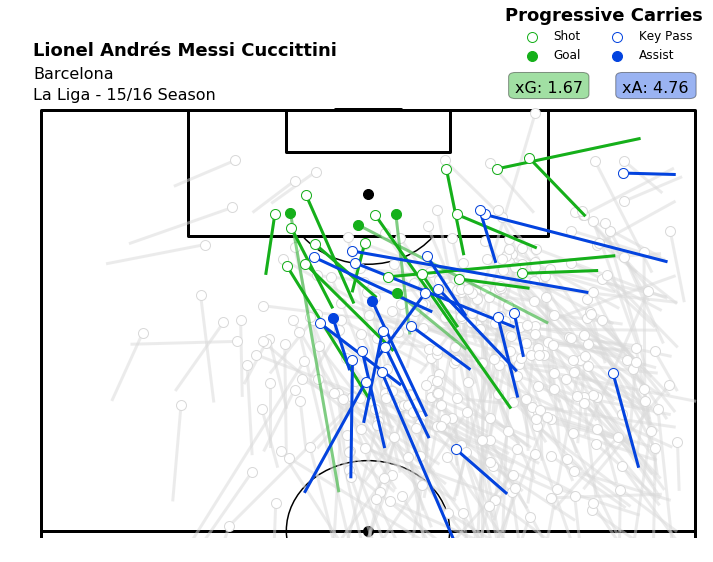

In [467]:
from matplotlib.patches import FancyBboxPatch, BoxStyle

fig, ax = draw_pitch('w','k','v','h')

m_car_s = m_car_prog_15[m_car_prog_15['outcome'] == 'Successful']
m_car_u = m_car_prog_15[m_car_prog_15['outcome'] == 'Unsuccessful']
m_car_shot = m_car_prog_15[(m_car_prog_15['shot_outcome'] != 'Goal')&(m_car_prog_15['shot_outcome'].notnull())]
m_car_goal = m_car_prog_15[(m_car_prog_15['shot_outcome'] == 'Goal')]
m_car_pass = m_car_s[(m_car_s['pass_outcome'].notnull())]
m_car_sa = m_car_pass[(m_car_pass['pass_outcome'] == 'Shot Assist')]
m_car_ga = m_car_pass[(m_car_pass['pass_outcome'] == 'Goal Assist')]
m_car_drib = m_car_s[(m_car_s['dribble_outcome'].notnull())]

xA_tot = m_car_prog_15[m_car_prog_15['xA'].notna()].xA.sum()
xG_tot = m_car_prog_15[m_car_prog_15['xG'].notna()].xG.sum()

xs = m_car_s['x'].values
ys = m_car_s['y'].values
xse = m_car_s['end_x'].values
yse = m_car_s['end_y'].values

xsh = m_car_shot['x'].values
ysh = m_car_shot['y'].values
xshe = m_car_shot['end_x'].values
yshe = m_car_shot['end_y'].values

xg = m_car_goal['x'].values
yg = m_car_goal['y'].values
xge = m_car_goal['end_x'].values
yge = m_car_goal['end_y'].values

xsa = m_car_sa['x'].values
ysa = m_car_sa['y'].values
xsae = m_car_sa['end_x'].values
ysae = m_car_sa['end_y'].values

xga = m_car_ga['x'].values
yga = m_car_ga['y'].values
xgae = m_car_ga['end_x'].values
ygae = m_car_ga['end_y'].values

xd = m_car_drib['x'].values
yd = m_car_drib['y'].values
xde = m_car_drib['end_x'].values
yde = m_car_drib['end_y'].values

zo=100
ax.plot([ys,yse],[xs,xse],'0.85',alpha=0.5,zorder=zo)
ax.scatter(yse,xse,s=100,facecolor='w',edgecolor='0.85',zorder=zo+1)
ax.plot([ysh,yshe],[xsh,xshe],'xkcd:green',alpha=1,zorder=zo+2)
ax.scatter(yshe,xshe,s=100,facecolor='w',edgecolor='xkcd:green',zorder=zo+3)
ax.plot([yg,yge],[xg,xge],'xkcd:green',alpha=0.5,zorder=zo+2)
ax.scatter(yge,xge,s=100,facecolor='xkcd:green',edgecolor='xkcd:green',zorder=zo+3)
ax.plot([ysa,ysae],[xsa,xsae],'xkcd:blue',alpha=1,zorder=zo+2)
ax.scatter(ysae,xsae,s=100,facecolor='w',edgecolor='xkcd:blue',zorder=zo+3)
ax.plot([yga,ygae],[xga,xgae],'xkcd:blue',alpha=1,zorder=zo+2)
ax.scatter(ygae,xgae,s=100,facecolor='xkcd:blue',edgecolor='xkcd:blue',zorder=zo+3)

ax.text(0.0,1.1,messi,transform=ax.transAxes,ha='left',va='bottom',fontsize=18,fontweight='semibold',zorder=zo)
ax.text(0.0,1.05,'Barcelona',transform=ax.transAxes,ha='left',va='bottom',fontsize=16,zorder=zo)
ax.text(0.0,1.00,'La Liga - 15/16 Season',transform=ax.transAxes,ha='left',va='bottom',fontsize=16,zorder=zo,)
ax.text(1.0,1.18,'Progressive Carries',transform=ax.transAxes,ha='right',va='bottom',fontsize=18,fontweight='semibold',zorder=zo)

ax.scatter(-100,-100,s=100,facecolor='w',edgecolor='xkcd:green',zorder=zo+3,label='Shot')
ax.scatter(-100,-100,s=100,facecolor='xkcd:green',edgecolor='xkcd:green',zorder=zo+3,label='Goal')
ax.scatter(-100,-100,s=100,facecolor='w',edgecolor='xkcd:blue',zorder=zo+3,label='Key Pass')
ax.scatter(-100,-100,s=100,facecolor='xkcd:blue',edgecolor='xkcd:blue',zorder=zo+3,label='Assist')

ax.legend(loc=4,bbox_to_anchor=(1.0,1.07),ncol=2,frameon=False,fontsize=12,framealpha=0,facecolor=None)

ax.add_patch(FancyBboxPatch((0.72,1.02),0.1,0.04,boxstyle='round,pad=0.01',transform=ax.transAxes,
                            facecolor='xkcd:green',edgecolor='k',alpha=0.4,clip_on=False,zorder=zo))
ax.text(0.72,1.025,'xG: {:.2f}'.format(xG_tot),transform=ax.transAxes,fontsize=16,zorder=zo)

ax.add_patch(FancyBboxPatch((0.88,1.02),0.1,0.04,boxstyle='round,pad=0.01',transform=ax.transAxes,
                            facecolor='xkcd:blue',edgecolor='k',alpha=0.4,clip_on=False,zorder=zo))
ax.text(0.88,1.025,'xA: {:.2f}'.format(xA_tot),transform=ax.transAxes,fontsize=16,zorder=zo)

plt.show()
#fig.savefig('example_plots/carry_map.pdf',bbox_inches='tight')

In [148]:
m_carries = {}
for year in years:
    m_carries[str(year)] = [get_carry_prog(match,find_success=True,player=messi) for match in event_data[str(year)]]

In [166]:
m_car_seas = {}
m_car_seas_suc = {}
for year in m_carries:
    m_car_seas[str(year)] = pd.concat(m_carries[str(year)])
    m_car_seas[str(year)].reset_index(inplace=True)
    m_car_seas_suc[str(year)] = m_car_seas[str(year)][m_car_seas[str(year)]['outcome'] == 'Successful']

In [440]:
m_car_seas_box = {}
m_car_seas_box_suc = {}
for year in m_carries:
    m_car_seas_box[str(year)] = m_car_seas[str(year)][(m_car_seas[str(year)]['end_x'] >= 102)&(m_car_seas[str(year)]['x'] <= 102)&(m_car_seas[str(year)]['end_y'] >= 18)&(m_car_seas[str(year)]['end_y'] <= 62)]
    m_car_seas_box_suc[str(year)] = m_car_seas_box[str(year)][m_car_seas_box[str(year)]['outcome'] == 'Successful']

In [442]:
m_car_seas_box_suc['2015'];

In [443]:
car_p_suc_frac = np.array([(len(m_car_seas_suc[str(years[i])]) / len(m_car_seas[str(years[i])])) for i in range(len(years))])
car_p_tot_p90 = np.array([(len(m_car_seas[str(years[i])]) / m_90_played[i]) for i in range(len(years))])
car_p_suc_p90 = np.array([(len(m_car_seas_suc[str(years[i])]) / m_90_played[i]) for i in range(len(years))])
car_p_tot_dist = np.array([m_car_seas[str(years[i])]['carry_dist'].mean() for i in range(len(years))])
car_p_suc_dist = np.array([m_car_seas_suc[str(years[i])]['carry_dist'].mean() for i in range(len(years))])
car_p_pass_frac = np.array([len(m_car_seas[str(years[i])][m_car_seas[str(years[i])]['pass_outcome'].notna()]) / len(m_car_seas[str(years[i])]) for i in range(len(years))])
car_p_shot_frac = np.array([len(m_car_seas[str(years[i])][m_car_seas[str(years[i])]['shot_outcome'].notna()]) / len(m_car_seas[str(years[i])]) for i in range(len(years))])
car_p_drib_frac = np.array([len(m_car_seas[str(years[i])][m_car_seas[str(years[i])]['dribble_outcome'].notna()]) / len(m_car_seas[str(years[i])]) for i in range(len(years))])
car_p_xG = np.array([m_car_seas[str(years[i])]['xG'].sum() for i in range(len(years))])
car_p_xA = np.array([m_car_seas[str(years[i])]['xA'].sum() for i in range(len(years))])
car_p_xG_p90 = np.array([m_car_seas[str(years[i])]['xG'].sum() / m_90_played[i] for i in range(len(years))])
car_p_xA_p90 = np.array([m_car_seas[str(years[i])]['xA'].sum() / m_90_played[i] for i in range(len(years))])
car_p_tot_box = np.array([len(m_car_seas_box[str(years[i])]) for i in range(len(years))])
car_p_suc_box = np.array([len(m_car_seas_box_suc[str(years[i])]) for i in range(len(years))])
car_p_tot_box_p90 = car_p_tot_box / np.array(m_90_played)
car_p_suc_box_p90 = car_p_suc_box / np.array(m_90_played)

In [461]:
len(m_car_seas_box['2014'][m_car_seas_box['2014']['pass_outcome'].notna()])

19

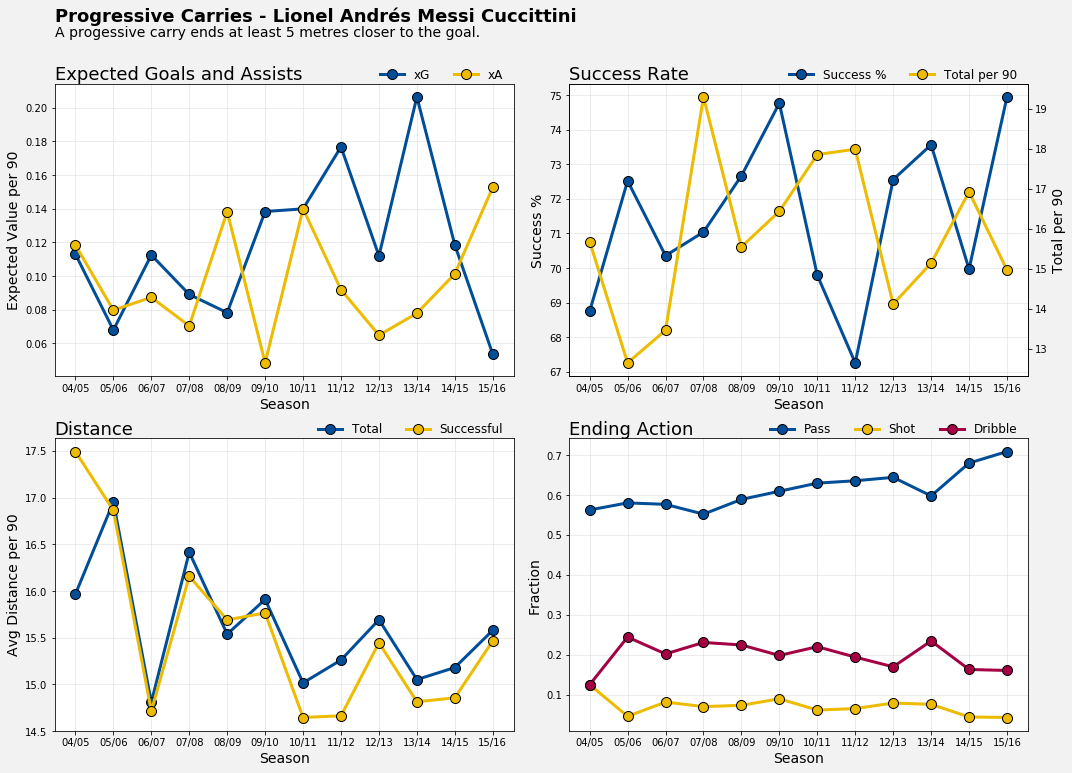

In [468]:
import matplotlib as mpl
#mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams.update({'axes.labelsize':14,'lines.linewidth':3,'lines.markersize':10})

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex='row',figsize=(15,10),facecolor='0.95')

ind = np.flip((np.arange(len(years))))
seasons = ['15/16','14/15','13/14','12/13','11/12','10/11','09/10','08/09','07/08','06/07','05/06','04/05']

ax1.text(0.0,1.2,'Progressive Carries - ' + messi,transform=ax1.transAxes,ha='left',va='bottom',fontsize=18,fontweight='semibold',zorder=zo)
ax1.text(0.0,1.15,'A progessive carry ends at least 5 metres closer to the goal.',transform=ax1.transAxes,ha='left',va='bottom',fontsize=14,zorder=zo)

ax1.plot(ind, car_p_xG_p90,'-o',c='#004d98',mec='k',label='xG')
ax1.plot(ind, car_p_xA_p90,'-o',c='#edbb00',mec='k',label='xA')
ax1.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Expected Value per 90')
ax1.legend(loc=1,bbox_to_anchor=(1.0,1.09),ncol=3,frameon=False,fontsize=12)
ax1.text(0.0,1.0,'Expected Goals and Assists',transform=ax1.transAxes,ha='left',va='bottom',fontsize=18,zorder=zo)
ax1.grid(alpha=0.3)

suc = ax2.plot(ind, car_p_suc_frac*100,'-o',c='#004d98',mec='k')
ax2r = ax2.twinx()
tot = ax2r.plot(ind, car_p_tot_p90,'-o',c='#edbb00',mec='k')
#tot = ax2r.plot(ind, car_p_tot_dist,'-o',c='#edbb00',mec='k')
ax2.set(xlabel='Season',ylabel='Success %')
ax2r.set(ylabel='Total per 90')
ax2.legend([suc[0],tot[0]],['Success %','Total per 90'],loc=1,bbox_to_anchor=(1.0,1.09),ncol=3,frameon=False,fontsize=12)
ax2.text(0.0,1.0,'Success Rate',transform=ax2.transAxes,ha='left',va='bottom',fontsize=18,zorder=zo)
ax2.grid(alpha=0.3)

tot = ax3.plot(ind, car_p_tot_dist,'-o',c='#004d98',mec='k')
#ax3r = ax3.twinx()
suc = ax3.plot(ind, car_p_suc_dist,'-o',c='#edbb00',mec='k')
ax3.set(xticks=ind,xticklabels=seasons,xlabel='Season',ylabel='Avg Distance per 90')
#ax3r.set(ylabel='Avg Successful Distance per 90')
ax3.legend([tot[0],suc[0]],['Total','Successful'],loc=1,bbox_to_anchor=(1.0,1.09),ncol=3,frameon=False,fontsize=12)
ax3.text(0.0,1.0,'Distance',transform=ax3.transAxes,ha='left',va='bottom',fontsize=18,zorder=zo)
ax3.grid(alpha=0.3)

pas = ax4.plot(ind, car_p_pass_frac,'-o',c='#004d98',mec='k')
#ax3r = ax3.twinx()
shot = ax4.plot(ind, car_p_shot_frac,'-o',c='#edbb00',mec='k')
drib = ax4.plot(ind, car_p_drib_frac,'-o',c='#a50044',mec='k')
ax4.set(xlabel='Season',ylabel='Fraction')
#ax3r.set(ylabel='Avg Successful Distance per 90')
ax4.legend([pas[0],shot[0],drib[0]],['Pass','Shot','Dribble'],loc=1,bbox_to_anchor=(1.0,1.09),ncol=3,frameon=False,fontsize=12)
ax4.text(0.0,1.0,'Ending Action',transform=ax4.transAxes,ha='left',va='bottom',fontsize=18,zorder=zo)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()
#fig.savefig('example_plots/messi_carries.pdf',bbox_inches='tight')

## Playing Position

In [305]:
mpl.rc_params()

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter